<a href="https://colab.research.google.com/github/SahilS1997/ICC-T20-Worldcup---A-Pre-Series-Analysis/blob/main/ICC_T20_Worldcup_A_Pre_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [40]:
import pandas as pd
import numpy as np
import time
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting Data from Source


##Team Performances in WT20s

In [41]:
data1=[]

for i in range(1,3):
  
  url = f'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;filter=advanced;orderby=start;orderbyad=reverse;page={i};size=200;template=results;trophy=89;type=team;view=results'
  df1 = pd.read_html(url,header=0)
  data1.append(df1[2])

wtc_team = pd.concat(data1,ignore_index=True)
wtc_team['Start Date']=pd.to_datetime(wtc_team['Start Date'])
wtc_team

,Team,Result,Margin,BR,Toss,Bat,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10
0,West Indies,won,4 wickets,2.0,won,2nd,NaN,v England,Kolkata,2016-04-03,NaN
1,England,lost,4 wickets,2.0,lost,1st,NaN,v West Indies,Kolkata,2016-04-03,NaN
2,West Indies,won,7 wickets,2.0,won,2nd,NaN,v India,Mumbai,2016-03-31,NaN
3,India,lost,7 wickets,2.0,lost,1st,NaN,v West Indies,Mumbai,2016-03-31,NaN
4,England,won,7 wickets,17.0,won,2nd,NaN,v New Zealand,Delhi,2016-03-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
351,Scotland,lost,51 runs,NaN,won,2nd,NaN,v Pakistan,Durban,2007-09-12,NaN
352,New Zealand,won,9 wickets,74.0,won,2nd,NaN,v Kenya,Durban,2007-09-12,NaN
353,Kenya,lost,9 wickets,74.0,lost,1st,NaN,v New Zealand,Durban,2007-09-12,NaN
354,South Africa,won,8 wickets,14.0,won,2nd,NaN,v West Indies,Johannesburg,2007-09-11,NaN


##Team Performances Post 2016 WT20

In [42]:
data4=[]

for i in range(1,9):
  url = f'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;filter=advanced;orderby=start;page={i};size=200;spanmin2=04+Apr+2016;spanval2=span;template=results;type=team;view=results'
  df4 = pd.read_html(url,header=0)
  data4.append(df4[2])

t20_team = pd.concat(data4,ignore_index=True)
t20_team['Start Date']=pd.to_datetime(t20_team['Start Date'])

t20_team

,Team,Result,Margin,BR,Toss,Bat,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10
0,Zimbabwe,won,2 runs,NaN,lost,1st,NaN,v India,Harare,2016-06-18,NaN
1,India,lost,2 runs,NaN,won,2nd,NaN,v Zimbabwe,Harare,2016-06-18,NaN
2,India,won,10 wickets,41.0,lost,2nd,NaN,v Zimbabwe,Harare,2016-06-20,NaN
3,Zimbabwe,lost,10 wickets,41.0,won,1st,NaN,v India,Harare,2016-06-20,NaN
4,India,won,3 runs,NaN,lost,1st,NaN,v Zimbabwe,Harare,2016-06-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1415,Sweden,lost,8 runs,NaN,won,2nd,NaN,v Denmark,Brondby,2021-08-14,NaN
1416,Sweden,won,3 wickets,0.0,won,2nd,NaN,v Denmark,Brondby,2021-08-14,NaN
1417,Denmark,lost,3 wickets,0.0,lost,1st,NaN,v Sweden,Brondby,2021-08-14,NaN
1418,Denmark,won,6 wickets,5.0,won,2nd,NaN,v Sweden,Brondby,2021-08-15,NaN


#Cleaning and Shaping the Data

In [43]:
#List of Quaified Teams 
q= ['India','England','South Africa','New Zealand','West Indies','Australia', 'Pakistan','Afghanistan','Sri Lanka','Bangladesh','Netherlands','Papua New Guinea','Ireland','Namibia','Scotland','Oman']

#Qualified teams Short name
qq= ['INDIA', 'ENG','SA', 'NZ', 'WI','AUS','PAK', 'AFG','SL','BDESH', 'NL' ,'PNG','IRE','NAM','SCOT','OMAN']

#creating Dimension table for Teams
q_teams =pd.DataFrame({'Team':q,
                       'team':qq})

q_teams

,Team,team
0,India,INDIA
1,England,ENG
2,South Africa,SA
3,New Zealand,NZ
4,West Indies,WI
5,Australia,AUS
6,Pakistan,PAK
7,Afghanistan,AFG
8,Sri Lanka,SL
9,Bangladesh,BDESH


In [44]:
#Append Both Tables
df=wtc_team.append(t20_team)


In [45]:
#Filtering the Rows with qualified teams
df = df[df.Team.isin(q_teams['Team'])]
#Removing unwanted columns and Re arranging Columns
df=df[['Team','Opposition','Result','Toss', 'Bat','Ground','Start Date']]
#changing Data Type of Date column
# wtc_team['Start Date']= pd.to_datetime(wtc_team['Start Date'])
#Replcing v from opposition
df["Opposition"]= df["Opposition"].str.replace('v ', '')
df["Bat"]= df["Bat"].str.replace('-', 'DNB')
df = df.merge(q_teams,how = 'left' ,on='Team')
df['Start Date']=pd.to_datetime(df['Start Date'])

#categorising
cat=[]
for d in df['Start Date']:
  if d in wtc_team['Start Date'].unique():
    cat.append('WT20s')
  else:
    cat.append('T20s')
df = df.assign(Cat = cat)
df

,Team,Opposition,Result,Toss,Bat,Ground,Start Date,team,Cat
0,West Indies,England,won,won,2nd,Kolkata,2016-04-03,WI,WT20s
1,England,West Indies,lost,lost,1st,Kolkata,2016-04-03,ENG,WT20s
2,West Indies,India,won,won,2nd,Mumbai,2016-03-31,WI,WT20s
3,India,West Indies,lost,lost,1st,Mumbai,2016-03-31,INDIA,WT20s
4,England,New Zealand,won,won,2nd,Delhi,2016-03-30,ENG,WT20s
...,...,...,...,...,...,...,...,...,...
1086,Australia,Bangladesh,lost,lost,2nd,Dhaka,2021-08-06,AUS,T20s
1087,Australia,Bangladesh,won,lost,2nd,Dhaka,2021-08-07,AUS,T20s
1088,Bangladesh,Australia,lost,won,1st,Dhaka,2021-08-07,BDESH,T20s
1089,Bangladesh,Australia,won,won,1st,Dhaka,2021-08-09,BDESH,T20s


In [46]:
#Number matches Played on various conditions
Team=[]
Opp = []
Toss = []
Bat = []
Res = []
Mat = []
Cat =[]
for r in df['Cat'].unique():
  for i in q_teams['Team']:
    for j in df['Toss'].unique():
      for k in df['Bat'].unique():
        for l in df['Result'].unique():
          wx = df[df['Cat']==r]
          w0 = wx[wx['Team']==i]
          w1 = w0[w0['Toss'] == j]
          w2 = w1[w1['Bat'] == k]
          w3 = w2[w2['Result'] == l]
          Cat.append(r)
          Team.append(i)
          Toss.append(j)
          Bat.append(k)
          Res.append(l)
          Mat.append(w3['Result'].count())
        


output = pd.DataFrame({'Team':Team,
                        'Toss':Toss,
                        'Bat':Bat,
                        'Res':Res,
                        'Mat':Mat,
                        'Cat':Cat})  

output

,Team,Toss,Bat,Res,Mat,Cat
0,India,won,2nd,won,6,WT20s
1,India,won,2nd,lost,4,WT20s
2,India,won,2nd,n/r,0,WT20s
3,India,won,2nd,tied,0,WT20s
4,India,won,2nd,aban,0,WT20s
...,...,...,...,...,...,...
1723,Oman,-,DNB,lost,0,T20s
1724,Oman,-,DNB,n/r,0,T20s
1725,Oman,-,DNB,tied,0,T20s
1726,Oman,-,DNB,aban,0,T20s


#Ploting Categorical Figures

In [47]:
#Merging short name of the Teams..for easy ploting
output = output.merge(q_teams,how = 'left' ,on='Team')

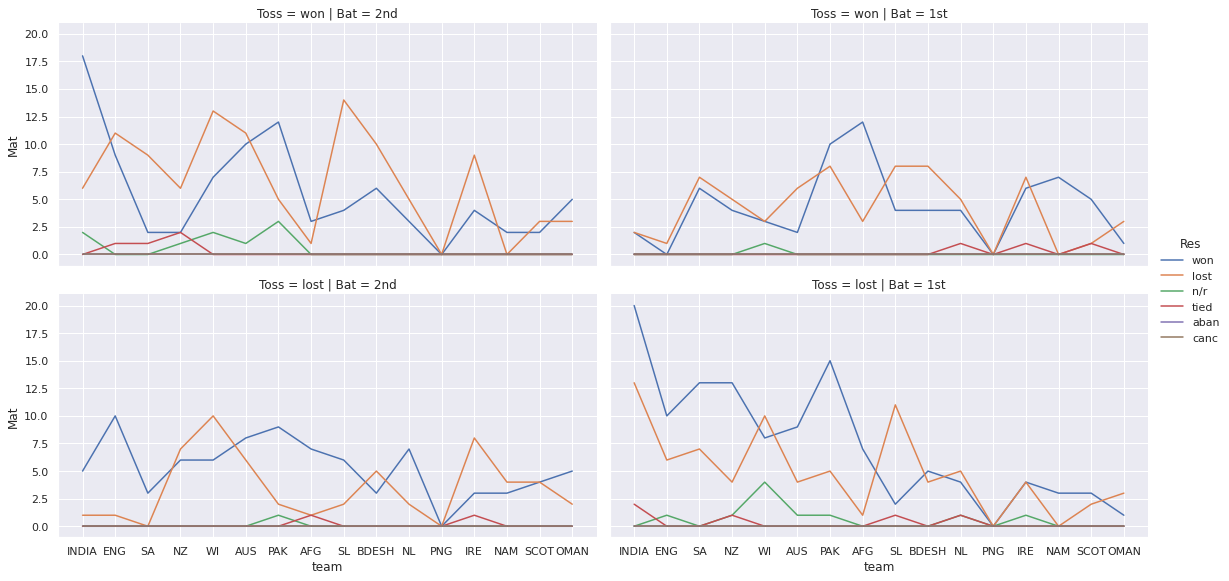

In [48]:
#Ploting  WT020s stats
outputw = output[(output['Bat']!='DNB') & (output['Toss']!='-') & (output['Cat']!='WT20s')]
sns.set(style="darkgrid")
sns.relplot(x="team",y = "Mat",hue ='Res',col = 'Bat',row = 'Toss',kind = 'line',data = outputw,height = 4,aspect =2)
plt.show()

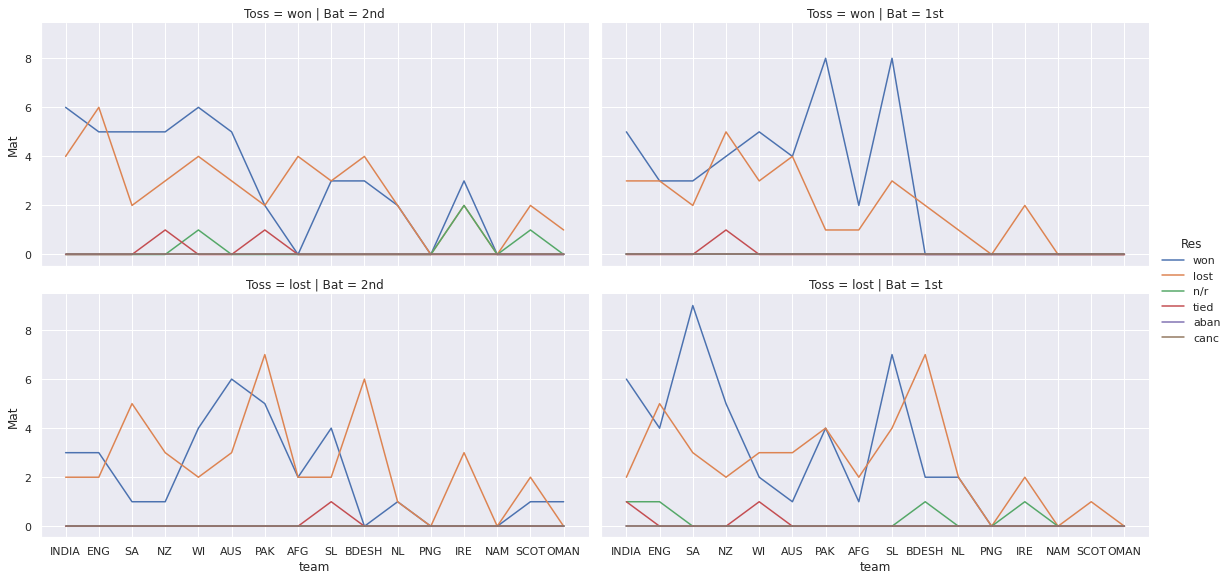

In [49]:
#Ploting  T20s stats
outputw = output[(output['Bat']!='DNB') & (output['Toss']!='-') & (output['Cat']!='T20s')]
sns.set(style="darkgrid")
sns.relplot(x="team",y = "Mat",hue ='Res',col = 'Bat',row = 'Toss',kind = 'line',data = outputw,height = 4,aspect =2)
plt.show()

In [50]:
output1 = output[(output['Bat']!='DNB') & (output['Toss']!='-') & (output['Cat']!='WT20s')]
output2 = pd.pivot_table(output1,values ='Mat',index = 'team',columns = ['Toss','Bat','Res'],aggfunc='sum',fill_value=True)
output2
#In WT20s

Toss  lost                              ... won                            
Bat    1st                         2nd  ... 1st  2nd                       
Res   aban canc lost n/r tied won aban  ... won aban canc lost n/r tied won
team                                    ...                                
AFG      0    0    1   0    0   7    0  ...  12    0    0    1   0    0   3
AUS      0    0    4   1    0   9    0  ...   2    0    0   11   1    0  10
BDESH    0    0    4   0    0   5    0  ...   4    0    0   10   0    0   6
ENG      0    0    6   1    0  10    0  ...   0    0    0   11   0    1   9
INDIA    0    0   13   0    2  20    0  ...   2    0    0    6   2    0  18
IRE      0    0    4   1    0   4    0  ...   6    0    0    9   0    0   4
NAM      0    0    0   0    0   3    0  ...   7    0    0    0   0    0   2
NL       0    0    5   1    1   4    0  ...   4    0    0    5   0    0   3
NZ       0    0    4   1    1  13    0  ...   4    0    0    6   1    2   2
OMAN     0    0    3   0    0   1    0  ...   1    0    0    3   0    0   5
PAK      0    0    5   1    0  15    0  ...  10    0    0    5   3    0  12
PNG      0    0    0   0    0   0    0  ...   0    0    0    0   0    0   0
SA       0    0    7   0    0  13    0  ...   6    0    0    9   0    1   2
SCOT     0    0    2   0    0   3    0  ...   5    0    0    3   0    0   2
SL       0    0   11   0    1   2    0  ...   4    0    0   14   0    0   4
WI       0    0   10   4    0   8    0  ...   3    0    0   13   2    0   7

[16 rows x 24 columns]

In [51]:
output3 = output[(output['Bat']!='DNB') & (output['Toss']!='-') & (output['Cat']!='T20s')]
output4 = pd.pivot_table(output3,values ='Mat',index = 'team',columns = ['Toss','Bat','Res'],aggfunc='sum',fill_value=True)
output4
#In T20s

Toss  lost                              ... won                            
Bat    1st                         2nd  ... 1st  2nd                       
Res   aban canc lost n/r tied won aban  ... won aban canc lost n/r tied won
team                                    ...                                
AFG      0    0    2   0    0   1    0  ...   2    0    0    4   0    0   0
AUS      0    0    3   0    0   1    0  ...   4    0    0    3   0    0   5
BDESH    0    0    7   1    0   2    0  ...   0    0    0    4   0    0   3
ENG      0    0    5   1    0   4    0  ...   3    0    0    6   0    0   5
INDIA    0    0    2   1    1   6    0  ...   5    0    0    4   0    0   6
IRE      0    0    2   1    0   0    0  ...   0    0    0    2   2    0   3
NAM      0    0    0   0    0   0    0  ...   0    0    0    0   0    0   0
NL       0    0    2   0    0   2    0  ...   0    0    0    2   0    0   2
NZ       0    0    2   0    0   5    0  ...   4    0    0    3   0    1   5
OMAN     0    0    0   0    0   0    0  ...   0    0    0    1   0    0   0
PAK      0    0    4   0    0   4    0  ...   8    0    0    2   0    1   2
PNG      0    0    0   0    0   0    0  ...   0    0    0    0   0    0   0
SA       0    0    3   0    0   9    0  ...   3    0    0    2   0    0   5
SCOT     0    0    1   0    0   0    0  ...   0    0    0    2   1    0   0
SL       0    0    4   0    0   7    0  ...   8    0    0    3   0    0   3
WI       0    0    3   0    1   2    0  ...   5    0    0    4   1    0   6

[16 rows x 24 columns]

###Categorising on the basis of Toss won / loss

In [57]:

To = []
Mo = []
Wo =[]
Lo = []
NRo = []
TIo = []
cato =[]
Tsso = []
MAo = []

for w in df['Cat'].unique():
  for q in df['Toss'].unique():  
    for i in q_teams['Team']:
      df1 = df[df['Cat']==w]
      wtc_team1 = df1[df1['Team']==i]
      wtc_team11 = wtc_team1[wtc_team1['Toss']==q]

      MAA = df1[(df1['Cat']==w)&(df1['Team']==i)]
      MAo.append(MAA['Team'].count())
      
      Tsso.append(q)
      cato.append(w)
      To.append(i)
      Mo.append(wtc_team11.Team.count())
      if wtc_team11[wtc_team11['Result']=='won'].Team.count() is not 0:
        Wo.append(wtc_team11[wtc_team11['Result']=='won'].Team.count())
      else:
        Wo.append(0)
      if wtc_team11[wtc_team11['Result']=='lost'].Team.count() is not 0:
        Lo.append(wtc_team11[wtc_team11['Result']=='lost'].Team.count())
      else:
        Lo.append(0)
      if wtc_team11[wtc_team11['Result']=='n/r'].Team.count() is not 0:
        NRo.append(wtc_team11[wtc_team11['Result']=='n/r'].Team.count())
      else:
        NRo.append(0)
      if wtc_team11[wtc_team11['Result']=='tied'].Team.count() is not 0:
        TIo.append(wtc_team11[wtc_team11['Result']=='tied'].Team.count())
      else:
        TIo.append(0)

      
wtc_team_perf= pd.DataFrame({'Team':To,
                                'Toss' : Tsso,
                              'Total Matches':MAo,
                              'Matches':Mo,
                              'Won':Wo,
                              'Lost':Lo,
                              'No Result':NRo,
                              'Tied':TIo,
                              'Cat':cato
                              })
wtc_team_perf['Win_percentage'] = round(wtc_team_perf['Won']/wtc_team_perf['Matches']*100,ndigits=2)
wtc_team_perf['loss_percentage'] =round(wtc_team_perf['Lost']/wtc_team_perf['Matches']*100,ndigits=2)
wtc_team_perf=wtc_team_perf.merge(q_teams,how ='left',on='Team')
wtc_team_perf

,Team,Toss,Total Matches,Matches,Won,Lost,No Result,Tied,Cat,Win_percentage,loss_percentage,team
0,India,won,33,18,11,7,0,0,WT20s,61.11,38.89,INDIA
1,England,won,32,17,8,9,0,0,WT20s,47.06,52.94,ENG
2,South Africa,won,30,12,8,4,0,0,WT20s,66.67,33.33,SA
3,New Zealand,won,30,19,9,8,0,2,WT20s,47.37,42.11,NZ
4,West Indies,won,31,19,11,7,1,0,WT20s,57.89,36.84,WI
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Papua New Guinea,-,0,0,0,0,0,0,T20s,NaN,NaN,PNG
92,Ireland,-,64,16,0,0,0,0,T20s,0.00,0.00,IRE
93,Namibia,-,24,5,0,0,0,0,T20s,0.00,0.00,NAM
94,Scotland,-,27,2,0,0,0,0,T20s,0.00,0.00,SCOT


In [55]:
wtc_team_perf

,Team,Toss,Total Matches,Matches,Won,Lost,No Result,Tied,Cat,Win_percentage,loss_percentage,team
0,India,won,33,18,11,7,0,0,WT20s,61.11,38.89,INDIA
1,England,won,32,17,8,9,0,0,WT20s,47.06,52.94,ENG
2,South Africa,won,30,12,8,4,0,0,WT20s,66.67,33.33,SA
3,New Zealand,won,30,19,9,8,0,2,WT20s,47.37,42.11,NZ
4,West Indies,won,31,19,11,7,1,0,WT20s,57.89,36.84,WI
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Papua New Guinea,-,0,0,0,0,0,0,T20s,NaN,NaN,PNG
92,Ireland,-,64,16,0,0,0,0,T20s,0.00,0.00,IRE
93,Namibia,-,24,5,0,0,0,0,T20s,0.00,0.00,NAM
94,Scotland,-,27,2,0,0,0,0,T20s,0.00,0.00,SCOT


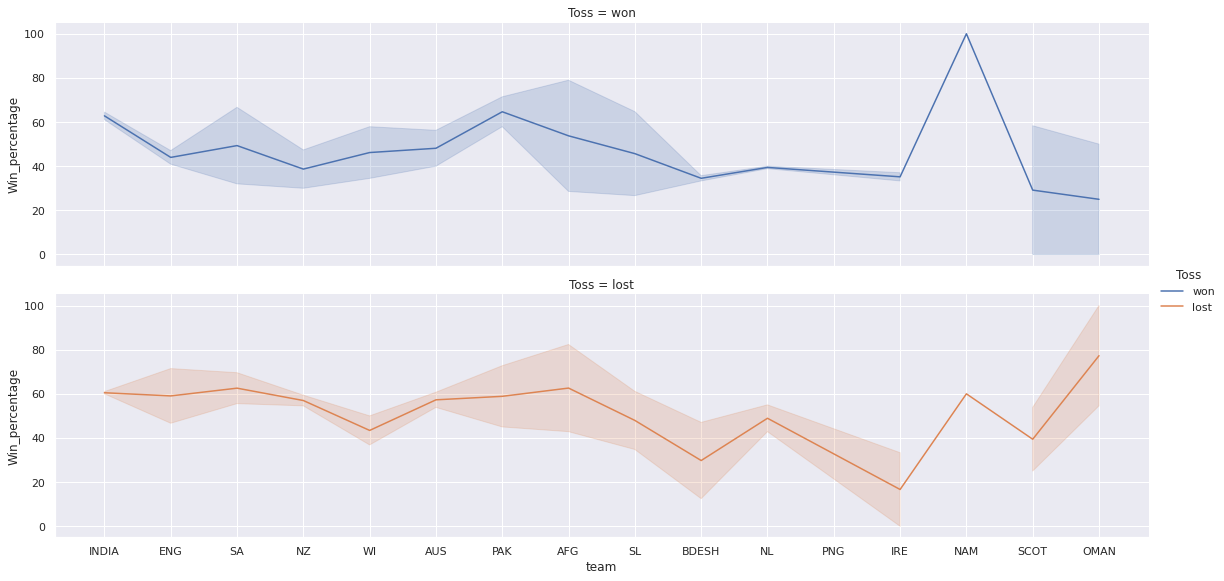

In [58]:
wtc_team_perf1 = wtc_team_perf[wtc_team_perf['Toss']!='-']
sns.set(style="darkgrid")
sns.relplot(x="team",y = "Win_percentage",hue ='Toss',row = 'Toss',kind = 'line',data = wtc_team_perf1,height = 4,aspect =4)
plt.show()
#Win percentage

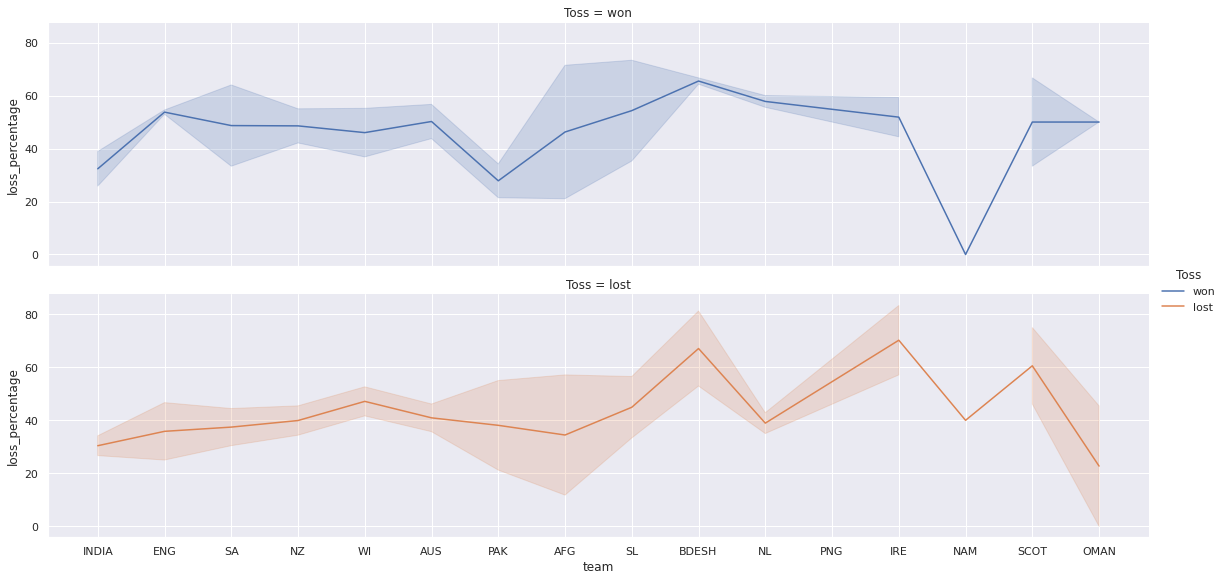

In [59]:
sns.set(style="darkgrid")
sns.relplot(x="team",y = "loss_percentage",hue ='Toss',row = 'Toss',kind = 'line',data = wtc_team_perf1,height = 4,aspect =4)
plt.show()
#loss percentage

###Categorising on the basis of Bat 1st / 2nd

In [60]:
Te = []
Ma = []
Wo =[]
Lo = []
NRu = []
TIe = []
inn = []
cate = []
MAoo =[]

for f in df['Cat'].unique():
  for g in df['Bat'].unique():
    for i in q_teams['Team'].unique():
    
      wtc_team2 = df[df['Team']==i]
      wtc_team22 = wtc_team2[wtc_team2['Bat']==g]
      MAAA = df[(df['Cat']==f)&(df['Team']==i)]
      MAoo.append(MAAA['Team'].count())
      
      cate.append(f)
      Ma.append(wtc_team22.Team.count())
      Te.append(i)
      inn.append(g)
      
      if wtc_team22[wtc_team22['Result']=='won'].Team.count() is not 0:
        Wo.append(wtc_team22[wtc_team22['Result']=='won'].Team.count())
        
      else:
        Wo.append(0)
      if wtc_team22[wtc_team22['Result']=='lost'].Team.count() is not 0:
        Lo.append(wtc_team22[wtc_team22['Result']=='lost'].Team.count())
      else:
        Lo.append(0)
      if wtc_team22[wtc_team22['Result']=='n/r'].Team.count() is not 0:
        NRu.append(wtc_team22[wtc_team22['Result']=='n/r'].Team.count())
      else:
        NRu.append(0)
      if wtc_team22[wtc_team22['Result']=='tied'].Team.count() is not 0:
        TIe.append(wtc_team22[wtc_team22['Result']=='tied'].Team.count())
      else:
        TIe.append(0)

wtc_team_perf_B = pd.DataFrame({'Team':Te,
                                 'Inn':inn,
                                 'Total Matches':MAoo,
                                 'Matches':Ma,
                                 'Won':Wo,
                                 'Lost':Lo,
                                 'No Result':NRu,
                                 'Tied':TIe,
                                 'Cat':cate
                                 })
wtc_team_perf_B['Win_percentage'] = round(wtc_team_perf_B['Won']/wtc_team_perf_B['Matches']*100,ndigits=2)
wtc_team_perf_B['loss_percentage'] =round(wtc_team_perf_B['Lost']/wtc_team_perf_B['Matches']*100,ndigits=2)
wtc_team_perf_B=wtc_team_perf_B.merge(q_teams,how ='left',on='Team')
wtc_team_perf_B

,Team,Inn,Total Matches,Matches,Won,Lost,No Result,Tied,Cat,Win_percentage,loss_percentage,team
0,India,2nd,33,47,32,13,2,0,WT20s,68.09,27.66,INDIA
1,England,2nd,32,48,27,20,0,1,WT20s,56.25,41.67,ENG
2,South Africa,2nd,30,28,11,16,0,1,WT20s,39.29,57.14,SA
3,New Zealand,2nd,30,37,14,19,1,3,WT20s,37.84,51.35,NZ
4,West Indies,2nd,31,55,23,29,3,0,WT20s,41.82,52.73,WI
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Papua New Guinea,DNB,0,0,0,0,0,0,T20s,NaN,NaN,PNG
92,Ireland,DNB,64,16,0,0,0,0,T20s,0.00,0.00,IRE
93,Namibia,DNB,24,5,0,0,0,0,T20s,0.00,0.00,NAM
94,Scotland,DNB,27,2,0,0,0,0,T20s,0.00,0.00,SCOT


In [61]:
df[(df['Bat']=='DNB') & (df['Team']=='Ireland')]

wtc_team_perf_B


,Team,Inn,Total Matches,Matches,Won,Lost,No Result,Tied,Cat,Win_percentage,loss_percentage,team
0,India,2nd,33,47,32,13,2,0,WT20s,68.09,27.66,INDIA
1,England,2nd,32,48,27,20,0,1,WT20s,56.25,41.67,ENG
2,South Africa,2nd,30,28,11,16,0,1,WT20s,39.29,57.14,SA
3,New Zealand,2nd,30,37,14,19,1,3,WT20s,37.84,51.35,NZ
4,West Indies,2nd,31,55,23,29,3,0,WT20s,41.82,52.73,WI
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Papua New Guinea,DNB,0,0,0,0,0,0,T20s,NaN,NaN,PNG
92,Ireland,DNB,64,16,0,0,0,0,T20s,0.00,0.00,IRE
93,Namibia,DNB,24,5,0,0,0,0,T20s,0.00,0.00,NAM
94,Scotland,DNB,27,2,0,0,0,0,T20s,0.00,0.00,SCOT


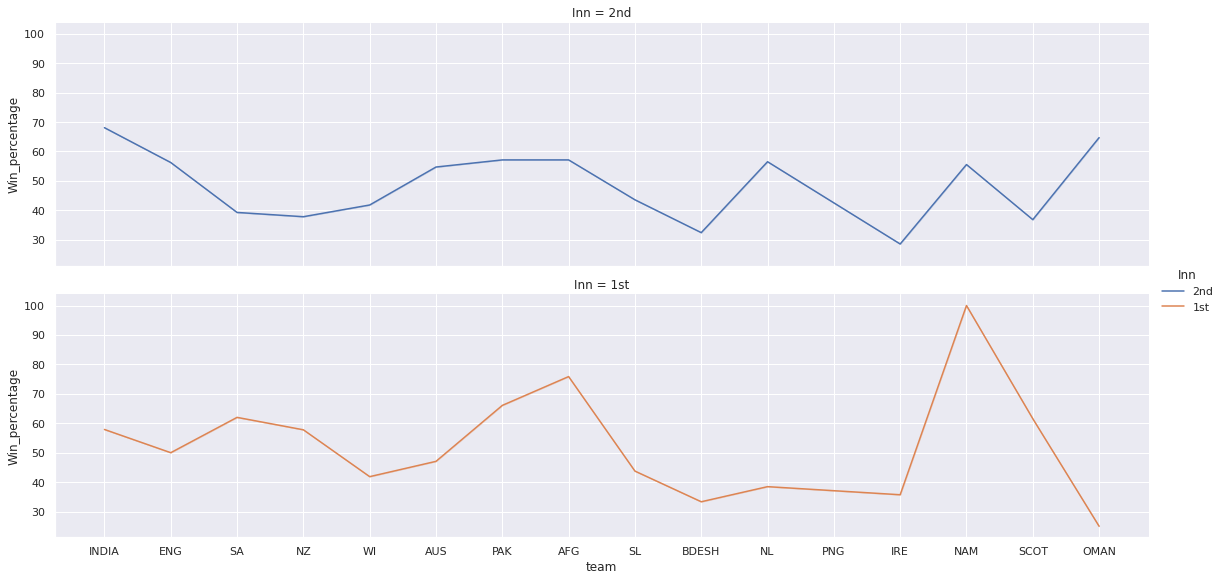

In [62]:
wtc_team_perf_B = wtc_team_perf_B[wtc_team_perf_B['Inn']!='DNB']
sns.set(style="darkgrid")
sns.relplot(x="team",y = "Win_percentage",hue ='Inn',row = 'Inn',kind = 'line',data = wtc_team_perf_B,height = 4,aspect =4)
plt.show()
#Win percentage 

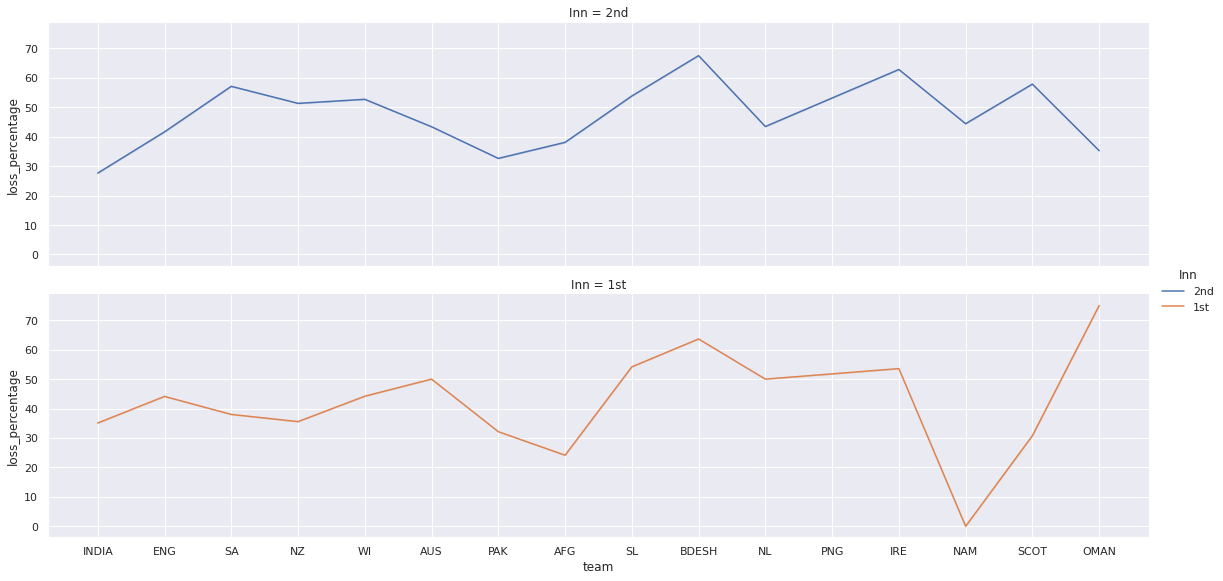

In [63]:
sns.set(style="darkgrid")
sns.relplot(x="team",y = "loss_percentage",hue ='Inn',row = 'Inn',kind = 'line',data = wtc_team_perf_B,height = 4,aspect =4)
plt.show()
#loss percentage

#Overall Figures

In [64]:

T = []
M = []
W =[]
L = []
NR = []
TI = []


for i in q_teams['Team']:
  
  wtc_team1 = wtc_team[wtc_team['Team']==i]

  T.append(i)
  M.append(wtc_team1.Team.count())
  if wtc_team1[wtc_team1['Result']=='won'].Team.count() is not 0:
    W.append(wtc_team1[wtc_team1['Result']=='won'].Team.count())
  else:
    W.append(0)
  if wtc_team1[wtc_team1['Result']=='lost'].Team.count() is not 0:
    L.append(wtc_team1[wtc_team1['Result']=='lost'].Team.count())
  else:
    L.append(0)
  if wtc_team1[wtc_team1['Result']=='n/r'].Team.count() is not 0:
    NR.append(wtc_team1[wtc_team1['Result']=='n/r'].Team.count())
  else:
    NR.append(0)
  if wtc_team1[wtc_team1['Result']=='tied'].Team.count() is not 0:
    TI.append(wtc_team1[wtc_team1['Result']=='tied'].Team.count())
  else:
    TI.append(0)

  
wtc_team_perf = pd.DataFrame({'Team':T,
                              'Match':M,
                              'Won':W,
                              'Lost':L,
                              'No Result':NR,
                              'Tied':TI,
                              })
wtc_team_perf['Win_percentage'] = round(wtc_team_perf['Won']/wtc_team_perf['Match']*100,ndigits=2)
wtc_team_perf['loss_percentage'] =round(wtc_team_perf['Lost']/wtc_team_perf['Match']*100,ndigits=2)

#Performance of Teams in T20 WC
wtc_team_perf

,Team,Match,Won,Lost,No Result,Tied,Win_percentage,loss_percentage
0,India,33,20,11,1,1,60.61,33.33
1,England,32,15,16,1,0,46.88,50.00
2,South Africa,30,18,12,0,0,60.00,40.00
3,New Zealand,30,15,13,0,2,50.00,43.33
4,West Indies,31,17,12,1,1,54.84,38.71
5,Australia,29,16,13,0,0,55.17,44.83
6,Pakistan,34,19,14,0,1,55.88,41.18
7,Afghanistan,14,5,9,0,0,35.71,64.29
8,Sri Lanka,35,22,12,0,1,62.86,34.29
9,Bangladesh,25,5,19,1,0,20.00,76.00


<BarContainer object of 16 artists>

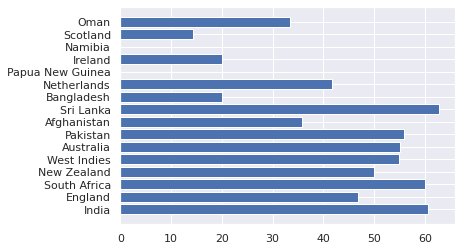

In [65]:
plt.barh(wtc_team_perf.Team,wtc_team_perf.Win_percentage,align = 'center')
# win percentage in Wt20s

<BarContainer object of 16 artists>

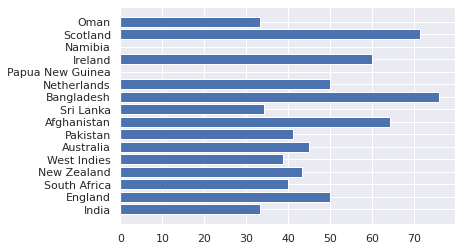

In [66]:
plt.barh(wtc_team_perf.Team,wtc_team_perf.loss_percentage,align = 'center')
# loss percentage in Wt20s

In [67]:

T1 = []
M1 = []
W1 =[]
L1 = []
NR1 = []
TI1 = []


for i in q_teams['Team']:
  
  t20_team1 = t20_team[t20_team['Team']==i]

  T1.append(i)
  M1.append(t20_team1.Team.count())
  if t20_team1[t20_team1['Result']=='won'].Team.count() is not 0:
    W1.append(t20_team1[t20_team1['Result']=='won'].Team.count())
  else:
    W1.append(0)
  if t20_team1[t20_team1['Result']=='lost'].Team.count() is not 0:
    L1.append(t20_team1[t20_team1['Result']=='lost'].Team.count())
  else:
    L1.append(0)
  if t20_team1[t20_team1['Result']=='n/r'].Team.count() is not 0:
    NR1.append(t20_team1[t20_team1['Result']=='n/r'].Team.count())
  else:
    NR1.append(0)
  if t20_team1[t20_team1['Result']=='tied'].Team.count() is not 0:
    TI1.append(t20_team1[t20_team1['Result']=='tied'].Team.count())
  else:
    TI1.append(0)

  
t20_team_perf = pd.DataFrame({'Team':T1,
                              'Match':M1,
                              'Won':W1,
                              'Lost':L1,
                              'No Result':NR1,
                              'Tied':TI1,
                              })
t20_team_perf['Win_percentage'] = round(t20_team_perf['Won']/t20_team_perf['Match']*100,ndigits=2)
t20_team_perf['loss_percentage'] =round(t20_team_perf['Lost']/t20_team_perf['Match']*100,ndigits=2)

#Performance of Teams in T20 WC
t20_team_perf

,Team,Match,Won,Lost,No Result,Tied,Win_percentage,loss_percentage
0,India,74,45,22,3,2,60.81,29.73
1,England,50,29,19,1,1,58.00,38.00
2,South Africa,50,24,23,0,1,48.00,46.00
3,New Zealand,60,25,22,2,3,41.67,36.67
4,West Indies,67,24,36,7,0,35.82,53.73
5,Australia,63,29,27,2,0,46.03,42.86
6,Pakistan,74,46,20,5,0,62.16,27.03
7,Afghanistan,38,29,6,0,1,76.32,15.79
8,Sri Lanka,53,16,35,1,1,30.19,66.04
9,Bangladesh,51,18,27,0,0,35.29,52.94


<BarContainer object of 16 artists>

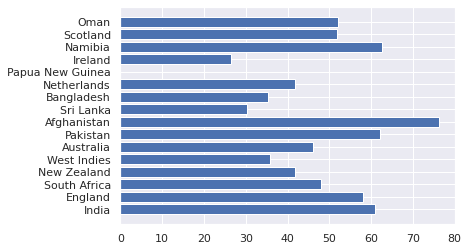

In [68]:
plt.barh(t20_team_perf.Team,t20_team_perf.Win_percentage,align = 'center')
# win percentage in t20s

<BarContainer object of 16 artists>

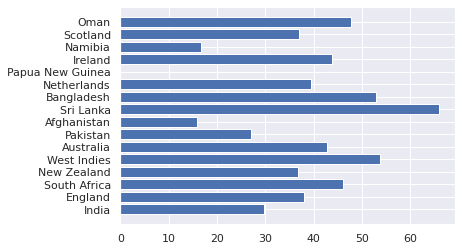

In [69]:
plt.barh(t20_team_perf.Team,t20_team_perf.loss_percentage,align = 'center')
# loss percentage in t20s